**ANALYSING THE IMPACT OF TV Ad MARKETING CAMPAIGN** 

Let's import the required libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
#mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore') # hide all warnings   # we can disable all warnings

Let's  load the data set and look at some initial rows and data types of the columns, trying to famaliarize ourselves with the data to enhance our analysis:

In [2]:
booking = pd.read_csv('NFDTVBookingData.csv') #load in the Booking data
session = pd.read_csv('NFDTVSessionData.csv') #load in the Session data
lookuptable = pd.read_csv('NFDRegionLookupTable.csv') # load in the RegionLookingUp data


lets check the initial rows in each data

In [3]:
booking.head(n=10) ## check FIRST 10 intial rows of booking data to familiarise with the data

,BookingDate,Channel,AreaName,BookingSource,BookingMedium,Bookings
0,31/12/2015,Phone,01. East,,,7
1,31/12/2015,Phone,10. Wales,,,2
2,31/12/2015,Web,01. East,(direct),(none),2
3,31/12/2015,Web,01. East,bing,cpc,1
4,31/12/2015,Web,02. East Midlands,nfeshot,email,1
5,31/12/2015,Web,03. London,cheapflights.co.uk,agg-api,1
6,31/12/2015,Web,03. London,fly.com,referral,1
7,31/12/2015,Web,03. London,KAYAK,agg-api,2
8,31/12/2015,Web,03. London,momondo.co.uk,agg-api,1
9,31/12/2015,Web,03. London,skyscanner,agg-api,39


1. From the initial rows it can observed that some *BookingSources* and *BookingMedium* are empty. This can be seen as the bookings which were made via the phone. Customers might have called the company phone number directly and data might have been inputed from CRM hence no BookingSource and BookingMedium indicating are Null or have missing values. 
2. Also Some BookingSource were ***direct*** booking which indicate customers entered the main website url directly into the web browser

In [4]:
booking.tail(n=10) # check LAST 10 intial rows of booking data to familiarise with the data

,BookingDate,Channel,AreaName,BookingSource,BookingMedium,Bookings
76467,01/06/2014,Web,11. West Midlands,NFProgrammes,email,1
76468,01/06/2014,Web,11. West Midlands,No Data,No Data,1
76469,01/06/2014,Web,11. West Midlands,www.travelsupermarket.com,agg-api,2
76470,01/06/2014,Web,12. Yorkshire And The Humber,(direct),(none),1
76471,01/06/2014,Web,12. Yorkshire And The Humber,KAYAK,agg-api,1
76472,01/06/2014,Web,12. Yorkshire And The Humber,momondo.com-[uk],agg-api,1
76473,01/06/2014,Web,12. Yorkshire And The Humber,topcashback,cashback,1
76474,01/06/2014,Web,13. Unknown (Bad or Foreign),google,cpc,2
76475,01/06/2014,Web,13. Unknown (Bad or Foreign),momondo.com-[uk],agg-api,1
76476,01/06/2014,Web,13. Unknown (Bad or Foreign),www.travelsupermarket.com,agg-api,1


1. From the tail of the Booking data it can be seen that the data contains some ***Unknown (Bad or Foreign)*** It can be seen that almost all of the AreaNames are in the United Kingdom hence the  Unknown (Bad or Foreign) area names were Areas outside the UK or unknown areas which could not be captured. 
2. There are also some entries in the **BookingSource** and **BookingMedium** which simply say ***No Data***. 
3. We will need to decide and find out how to deal with this data as. Do we have to remove them or get the right area names?

Lets examine which **AreaNames** had the highest bookings and which **BookingSource** they used the most

In [5]:
booking_city = booking.groupby(by=['AreaName','BookingSource']).sum()
#booking_city = booking.groupby(by=['BookingSource']).sum() # this shows only the highest booking source. result is skyscanner (56355 bookings)
booking_city =booking_city.sort(columns='Bookings' , ascending=False) # we will sort the cities and sources by the highest number of bookings
booking_city

Bookings
AreaName                     BookingSource                         
03. London                   skyscanner                       13165
05. North West               skyscanner                        7827
07. Scotland                 skyscanner                        6924
05. North West                                                 6629
08. South East               skyscanner                        5672
03. London                   google                            5436
                                                               5250
05. North West               google                            4814
08. South East               google                            4610
                                                               4554
12. Yorkshire And The Humber skyscanner                        4402
11. West Midlands            skyscanner                        4133
07. Scotland                 google                            3766
                                                               3294
12. Yorkshire And The Humber                                   3252
01. East                     skyscanner                        3180
                                                               3021
12. Yorkshire And The Humber google                            2892
11. West Midlands                                              2875
09. South West               skyscanner                        2863
01. East                     google                            2790
02. East Midlands            skyscanner                        2781
11. West Midlands            google                            2688
09. South West               google                            2467
                                                               2332
02. East Midlands                                              2173
                             google                            2152
04. North East               skyscanner                        2095
13. Unknown (Bad or Foreign) google                            1790
03. London                   No Data                           1788
...                                                             ...
05. North West               delta-search.com                     1
                             duckduckgo.com                       1
10. Wales                    yieldify                             1
05. North West               easyvoyage                           1
                             everdealz.com                        1
                             farecompare.com                      1
10. Wales                    ww.netflights.com                    1
05. North West               forums.moneysavingexpert.com         1
10. Wales                    vouchercloud.com                     1
05. North West               foxcoupon.com                        1
                             goodskins.com                        1
10. Wales                    travelsupermarket.com                1
05. North West               holidaypirates.digidip.net           1
                             hotukdeals.com                       1
10. Wales                    skyscanner.net                       1
05. North West               iservice.boccc.com.hk                1
10. Wales                    securesuite.co.uk                    1
                             secure5.arcot.com                    1
                             secure.barclaycard.co.uk             1
                             search.tb.ask.com                    1
                             search.orange.co.uk                  1
05. North West               k9safesearch.com                     1
10. Wales                    resp.survey01.net                    1
05. North West               mailzone.onetel.net.uk               1
                             momondo.com                          1
                             myvouchercodes.co.uk                 1
                             promopro.co.uk    

In [6]:
booking_city_plot = booking_city.head(n=11)
booking_city_plot

Bookings
AreaName                     BookingSource          
03. London                   skyscanner        13165
05. North West               skyscanner         7827
07. Scotland                 skyscanner         6924
05. North West                                  6629
08. South East               skyscanner         5672
03. London                   google             5436
                                                5250
05. North West               google             4814
08. South East               google             4610
                                                4554
12. Yorkshire And The Humber skyscanner         4402

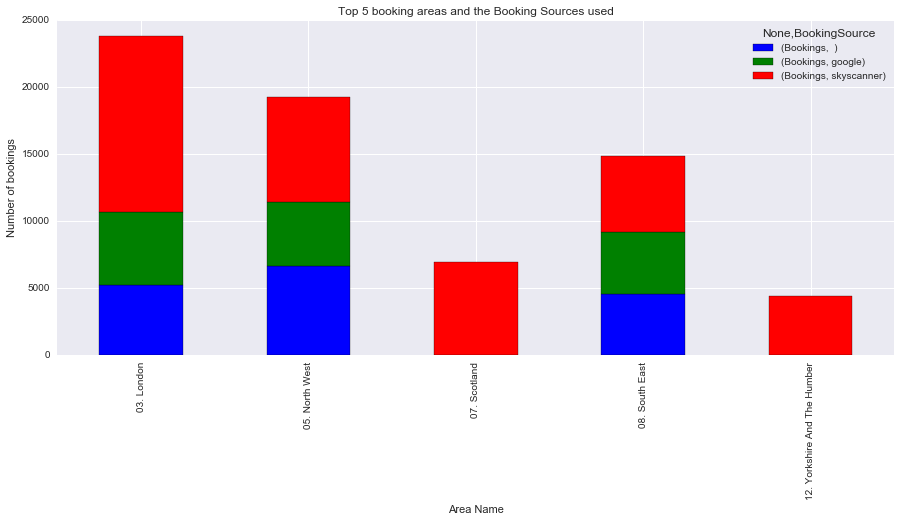

In [7]:
#lets visualsize this : 
booking_city_plot = booking_city.head(n=11)
my_plot = booking_city_plot.unstack().plot(kind="bar", stacked=True, title="Top 5 booking areas and the Booking Sources used")
my_plot.set_xlabel('Area Name')
my_plot.set_ylabel('Number of bookings')

1. From the table above it can be seen that **London** had the highest number of bookings and most of them were done via **skyscanner**. 
2. The scond highest Area name by booking was 
**05. North West** and the booking were done via same source - skyscanner. 
3. Another discovery is that, BookingSource of some of the AreasNames with the highest bookings is blank which indicates those bookings might have been done over the phone or the source were not captured. 

In [8]:
session.head(n=10) #check FIRST 10 intial rows of session data to familiarise with the data

,Date,City,Country,Source,Medium,Sessions
0,(other),(other),(other),(other),(other),912338
1,20151210,London,United Kingdom,cheapflights.co.uk,email,4173
2,20141215,London,United Kingdom,nfeshot,email,3825
3,20141125,London,United Kingdom,nfeshot,email,3260
4,20150430,London,United Kingdom,nfeshot,email,3190
5,20140624,London,United Kingdom,nfeshot,email,3070
6,20151124,London,United Kingdom,dfa,cpm,2953
7,20150820,London,United Kingdom,nfeshot,email,2943
8,20141128,London,United Kingdom,nfeshot,email,2791
9,20150819,London,United Kingdom,nfeshot,email,2743


It can be seen that the sessions Data has ***"other"*** as an entry in the each  Columns and it indicates the data on that row was not captured in terms of Date, City, Country and Source for that session. We will need to decide how to handle that

In [9]:
session.tail(n=10) #check LAST 10 intial rows of session data to familiarise with the data

,Date,City,Country,Source,Medium,Sessions
2999990,20160404,Marmaris,Turkey,trivago.co.uk,referral,1
2999991,20160404,Tallinn,Estonia,wego,agg-non-api,1
2999992,20160404,Athens,Greece,google,organic,1
2999993,20160404,Valmiera,Latvia,netflights.com,urlredirect,1
2999994,20160404,Riga,Latvia,celakaja.lv,referral,1
2999995,20160404,Riga,Latvia,sapnumedniece.lv,referral,1
2999996,20160404,Riga,Latvia,www.travelsupermarket.com,agg-api,1
2999997,20160404,Trencin,Slovakia,google,organic,1
2999998,20160404,Bratislava,Slovakia,travelzoo,agg-non-apii,1
2999999,20160404,Bratislava,Slovakia,travelzoo.com,referral,1


Lets examine which cities, the  sessions and which Sources the session was through

In [10]:
session_city = session.groupby(by=['City','Source']).sum()
session_city.sort_values(by='Sessions' , ascending=False)


Sessions
City                Source                             
London              google                       952267
(other)             (other)                      912338
London              cheapflights.co.uk           485543
                    nfeshot                      447527
                    skyscanner                   340322
                    NFProgrammes                 175016
                    dealchecker                  170128
                    (direct)                     167461
(not set)           google                       138281
London              www.travelsupermarket.com    137119
Manchester          google                       102548
Leeds               google                        98136
London              trivago                       93884
Birmingham          google                        92608
Liverpool           google                        90364
Glasgow             google                        90225
Edinburgh           google                        88246
London              netflights.com                79669
Sheffield           google                        64906
London              trip-advisor                  58851
(not set)           nfeshot                       58157
Newcastle upon Tyne google                        57221
Leicester           google                        50490
Bristol             google                        49648
London              FareCompare                   46275
Preston             google                        45815
Nottingham          google                        41916
Glasgow             nfeshot                       41441
Edinburgh           nfeshot                       40916
Manchester          cheapflights.co.uk            40530
...                                                 ...
Kuldiga             FareCompare                       1
Kula                whichbudget.com                   1
                    trivago                           1
                    liligo                            1
                    google.rs                         1
                    globalgrasshopper.com             1
Kumamoto            www.netflights.co.uk              1
Kumasi              (direct)                          1
                    skyscanner                        1
                    whichbudget.com                   1
Kunming             so.com                            1
                    msn                               1
                    momondo.com-[uk]                  1
                    m.baidu.com                       1
                    google                            1
Kungshamn           nfeshot                           1
                    google                            1
                    cheapflights.co.uk                1
Kungsbacka          momondo.co.uk                     1
                    FareCompare                       1
Kungsangen          nfeshot                           1
                    cheapflights.co.uk                1
                    FareCompare                       1
                    (direct)                          1
Kungalv             nfeshot                           1
                    netflights.com                    1
                    momondo.co.uk                     1
                    NFProgrammes                      1
Kumul               cheapflights.co.uk                1
Краснознаменск      cheapflights.co.uk                1

[161185 rows x 1 columns]

The above talbe shows the grouping by City Source and Sessions

In [11]:
lookuptable.head(n=10) ## check FIRST 10 intial rows of lookuptable data to familiarise with the data

,City,Region
0,(not set),NaN
1,Abingdon,03. London
2,Accrington,05. North West
3,Acle,01. East
4,Addlestone,08. South East
5,Alcester,11. West Midlands
6,Alconbury,01. East
7,Aldbourne,09. South West
8,Alderley Edge,05. North West
9,Aldershot,08. South East


it can be observed from the lookuptable that there are some CITIES and REGIONS which were not set or camptured. This might be cities outside the Uk. 
Now we have to make a decision whether or not to include these unset CITIES and REGIONS in our analysis:

In [14]:
lookuptable.tail(n=10) ## check LAST 10 rows of lookuptable data to familiarise with the data

,City,Region
842,DE6,tony
843,LA6,tony
844,MK19,tony
845,PE9,tony
846,OX15,tony
847,lu7,tony
848,SK14,tony
849,SP6,tony
850,SN6,tony
851,LA2,tony


it can be observed that the last 10 rows all contains the same REGION name which is ***"tony"*** but they do not have specific 
town names instead only postcodes. This suggests, Cities could not be associated with those postcodes hence default value of **tony** given to all of them or  there might have been a wrong data entry or something wrong with the data 
which need to be looked into. So the decision will be check and fix these CITY and REGIONS with the correct data or ignore this all 
this data in our analysis




**Now lets check the data types in these data we are working with and examine if they are in the correct formats**


In [15]:
booking.dtypes

BookingDate      object
Channel          object
AreaName         object
BookingSource    object
BookingMedium    object
Bookings          int64
dtype: object

In [16]:
session.dtypes

Date        object
City        object
Country     object
Source      object
Medium      object
Sessions     int64
dtype: object

In [17]:
lookuptable.dtypes

City      object
Region    object
dtype: object

All the data in the columns are in the correct format. However it can be observed that Date is not shown as datetime. We will convert that to date time as we proceed below as that format will help us in further analysis



**Now lets look at some summary statistics about the data** 

Since the Netflights TV ad campaign and the business is about bookings, it is no doubt the most important feature in this our data is **booking** so let us have a look at some statistics about the number of bookings in the booking data

In [18]:
booking['Bookings'].describe() # let's get summary statistics about the number of bookings

count    76477.000000
mean         2.755273
std          3.682527
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         79.000000
Name: Bookings, dtype: float64

it can be seen that there are a total of 76477 bookings. the average number of bookings is approx 3 bookings. 
The minimum number of bookings is 1 and the highest number of bookings 79. 
it can also be seen that 25% of the total number of bookings as well as  50% of the total bookings is 1 and 75% of the bookings are below 3 bookings

**Finding the relationship between the datasets**

**Observations:** 
1. It can be seen that the entries in the SESSION data are only those that came from the web
2. Phone bookings are  NOT in the SessionData . It might have come from CRM which was then recorded into the BookingData
3. The BookingData only has the years 2014 and 2015 dates and bookings 
4. The SessionData has more year date records, that is years 2014, 2015, 2016 data
5. The SessionData and RegionLookupTable both have common entries for city
6. The regions in the RegionLookupTable are all Uk regions with the exception of the *tony* which we are not sure yet

In [19]:
#we will join the SessionData and RegionLookupTable on the CITY to get one large data to make analysis easier and straightforward 
SessionAndLookUp = pd.merge(session, lookuptable, on='City', how='left')
SessionAndLookUp.head()

,Date,City,Country,Source,Medium,Sessions,Region
0,(other),(other),(other),(other),(other),912338,NaN
1,20151210,London,United Kingdom,cheapflights.co.uk,email,4173,03. London
2,20141215,London,United Kingdom,nfeshot,email,3825,03. London
3,20141125,London,United Kingdom,nfeshot,email,3260,03. London
4,20150430,London,United Kingdom,nfeshot,email,3190,03. London


it can been seen from the left join that all are cities in the session data have now been aligned with their correct regions from the RegionLookUp data

In [20]:
SessionAndLookUp.tail(n=10)

,Date,City,Country,Source,Medium,Sessions,Region
2999990,20160404,Marmaris,Turkey,trivago.co.uk,referral,1,NaN
2999991,20160404,Tallinn,Estonia,wego,agg-non-api,1,NaN
2999992,20160404,Athens,Greece,google,organic,1,NaN
2999993,20160404,Valmiera,Latvia,netflights.com,urlredirect,1,NaN
2999994,20160404,Riga,Latvia,celakaja.lv,referral,1,NaN
2999995,20160404,Riga,Latvia,sapnumedniece.lv,referral,1,NaN
2999996,20160404,Riga,Latvia,www.travelsupermarket.com,agg-api,1,NaN
2999997,20160404,Trencin,Slovakia,google,organic,1,NaN
2999998,20160404,Bratislava,Slovakia,travelzoo,agg-non-apii,1,NaN
2999999,20160404,Bratislava,Slovakia,travelzoo.com,referral,1,NaN


Looking at the tail of the resulting table we can see that all cities in foreign countries could not be assigned to a regions as all the regions in the RegionLookupTable are all UK regions

**FURTHER TV AD CAMPAINGN AND GENERAL ANALYSES AND VISUALIZATIONS **

Since TV Ad was shown in 'North West’, ‘Yorkshire and the Humber’ and the ‘Midlands’ we will subset data to only data the include these 4 areas (Midlands is grouped into East and West Midlands so we will count each separately), so we can do a more indepth analysis on the effect of the TV ad

In [22]:
nym_data = booking.loc[booking['AreaName'].isin(['05. North West','12. Yorkshire And The Humber','02. East Midlands', '11. West Midlands'])]

In [23]:
nym_data.head() # check head of the data

,BookingDate,Channel,AreaName,BookingSource,BookingMedium,Bookings
4,31/12/2015,Web,02. East Midlands,nfeshot,email,1
16,31/12/2015,Web,05. North West,skyscanner,agg-api,11
17,31/12/2015,Web,05. North West,www.travelsupermarket.com,agg-api,2
32,31/12/2015,Web,11. West Midlands,bankmillennium.pl,referral,1
33,31/12/2015,Web,11. West Midlands,bing,organic,1


In [24]:
nym_data.tail() # check head of the data

,BookingDate,Channel,AreaName,BookingSource,BookingMedium,Bookings
76469,01/06/2014,Web,11. West Midlands,www.travelsupermarket.com,agg-api,2
76470,01/06/2014,Web,12. Yorkshire And The Humber,(direct),(none),1
76471,01/06/2014,Web,12. Yorkshire And The Humber,KAYAK,agg-api,1
76472,01/06/2014,Web,12. Yorkshire And The Humber,momondo.com-[uk],agg-api,1
76473,01/06/2014,Web,12. Yorkshire And The Humber,topcashback,cashback,1


lets  check the data types of our booking data for these areas

In [25]:
nym_data.dtypes


BookingDate      object
Channel          object
AreaName         object
BookingSource    object
BookingMedium    object
Bookings          int64
dtype: object

lets ensure that the date column is treated as datetime so we can do some analysis with the date and bookings

In [26]:
nym_data['BookingDate'] = pd.to_datetime(nym_data['BookingDate']) # convert BookingDate column as datetime

now lets check that BookingDate colum is a datetime

In [27]:
nym_data.dtypes

BookingDate      datetime64[ns]
Channel                  object
AreaName                 object
BookingSource            object
BookingMedium            object
Bookings                  int64
dtype: object

In [30]:
##lets group our booking by Channel and check how many times each channel was used in booking
nym_data_channel = nym_data
nym_data_channel = nym_data_channel.groupby(by='Channel',  sort=False)
#nym_data_channel = nym_data_channel.groupby(by=['Channel','BookingDate'],  sort=False)
nym_data_channel.size()


Channel
Web      23213
Phone     2238
dtype: int64

it can be seen from the grouping that in the 4 areas under consideration 2 channels were used, that is **Web** and **Phone**. of the 2 , **webs** was used the most

In [32]:
##lets group bookingsource and check how many individual instances each booking source was used and sort with the highest
#number of bookings on top
nym_data_bookingsource = nym_data
nym_data_bookingsource = nym_data_bookingsource.groupby(by=['BookingSource']).sum()
nym_data_bookingsource= nym_data_bookingsource.sort(columns='Bookings' , ascending=False)
nym_data_bookingsource.head(n=10)


,Bookings
BookingSource,
skyscanner,19143
,14929
google,12546
www.travelsupermarket.com,3226
No Data,2862
cheapflights.co.uk,2498
quidco-[uk],2404
(direct),1988
topcashback,1774


It can be seen that in these 4 areas, the highest Booking source is **skyscanner** 

lets grougby Area Name and then stack the Booking sources corresponding to them along side the sum of all the bookings for each booking source

In [35]:
nym_data_areabooking = nym_data
nym_data_areabooking = nym_data_areabooking.groupby(by=['AreaName','BookingSource']).sum()
nym_data_areabooking= nym_data_areabooking.sort(columns='Bookings' , ascending=False)
nym_data_areabooking


Bookings
AreaName                     BookingSource                                      
05. North West               skyscanner                                     7827
                                                                            6629
                             google                                         4814
12. Yorkshire And The Humber skyscanner                                     4402
11. West Midlands            skyscanner                                     4133
12. Yorkshire And The Humber                                                3252
                             google                                         2892
11. West Midlands                                                           2875
02. East Midlands            skyscanner                                     2781
11. West Midlands            google                                         2688
02. East Midlands                                                           2173
                             google                                         2152
05. North West               www.travelsupermarket.com                      1129
                             No Data                                        1089
                             cheapflights.co.uk                              893
                             quidco-[uk]                                     881
                             (direct)                                        781
12. Yorkshire And The Humber www.travelsupermarket.com                       768
11. West Midlands            www.travelsupermarket.com                       733
                             No Data                                         652
05. North West               topcashback                                     634
12. Yorkshire And The Humber quidco-[uk]                                     630
                             No Data                                         623
                             cheapflights.co.uk                              615
02. East Midlands            www.travelsupermarket.com                       596
11. West Midlands            cheapflights.co.uk                              588
05. North West               KAYAK                                           565
11. West Midlands            quidco-[uk]                                     500
02. East Midlands            No Data                                         498
11. West Midlands            (direct)                                        456
...                                                                          ...
05. North West               advantage.peoplevalue.co.uk                       1
                             acs.hanacard.co.kr                                1
                             SkyScanner                                        1
                             N4378.286450.AMNET22                              1
                             N4378.286450.AMNET                                1
                             cashback.shopperdiscountsandrewards.co.uk         1
                             clk.tradedoubler.com                              1
11. West Midlands            myvouchercodes.co.uk                              1
                             search.mywebsearch.com                            1
05. North West               hotukdeals.com                                    1
                             holidaypirates.digidip.net                        1
11. West Midlands            paymentbrokerservice.comtec-europe.net            1
05. North West               goodskins.com                                     1
11. West Midlands            resp.survey01.net                                 1
                             search.foxtab.com                                 1
05. North West               foxcoupon.com                                     1
11. West Midlands            search.incredibar.com                             1
                      

From the above data it can be seen that the highest number of bookings in this 4 areas was 7827 and this was in 05. North West and was recorded via **skyscanner**. There next highest booking was also in the area **05. North West** did not have the booking source recorded which gives a hint those bookings might have been through the phone. The third was booking was also the same area **05. North West** and it was through google. 


In [40]:
nym_data_areabooking.head() # top AreaName by Booking sources sorted by number of bookings

Bookings
AreaName                     BookingSource          
05. North West               skyscanner         7827
                                                6629
                             google             4814
12. Yorkshire And The Humber skyscanner         4402
11. West Midlands            skyscanner         4133

In [41]:
nym_data_areabooking.tail() # bottom AreaNames by Booking sources sorted by number of bookings

Bookings
AreaName                     BookingSource             
05. North West               everdealz.com            1
                             easyvoyage               1
                             duckduckgo.com           1
                             delta-search.com         1
12. Yorkshire And The Humber yieldify                 1

Lets try and get some visualization of AreaName and Channel used most

In [42]:
nym_data_to_plot = nym_data
nym_data_to_plot.head()

,BookingDate,Channel,AreaName,BookingSource,BookingMedium,Bookings
4,2015-12-31,Web,02. East Midlands,nfeshot,email,1
16,2015-12-31,Web,05. North West,skyscanner,agg-api,11
17,2015-12-31,Web,05. North West,www.travelsupermarket.com,agg-api,2
32,2015-12-31,Web,11. West Midlands,bankmillennium.pl,referral,1
33,2015-12-31,Web,11. West Midlands,bing,organic,1


In [43]:
#lets examine bookings as per AreaName and Channel in these 4 areas. 
nym_data_to_plot_grp = nym_data_to_plot.groupby(['AreaName','Channel']).sum()
nym_data_to_plot_grp.head()

Bookings
AreaName          Channel          
02. East Midlands Phone        2173
                  Web          9347
05. North West    Phone        6629
                  Web         22250
11. West Midlands Phone        2875

In [44]:
nym_data_to_plot_grp.unstack().head()

Bookings       
Channel                         Phone    Web
AreaName                                    
02. East Midlands                2173   9347
05. North West                   6629  22250
11. West Midlands                2875  12689
12. Yorkshire And The Humber     3252  13149

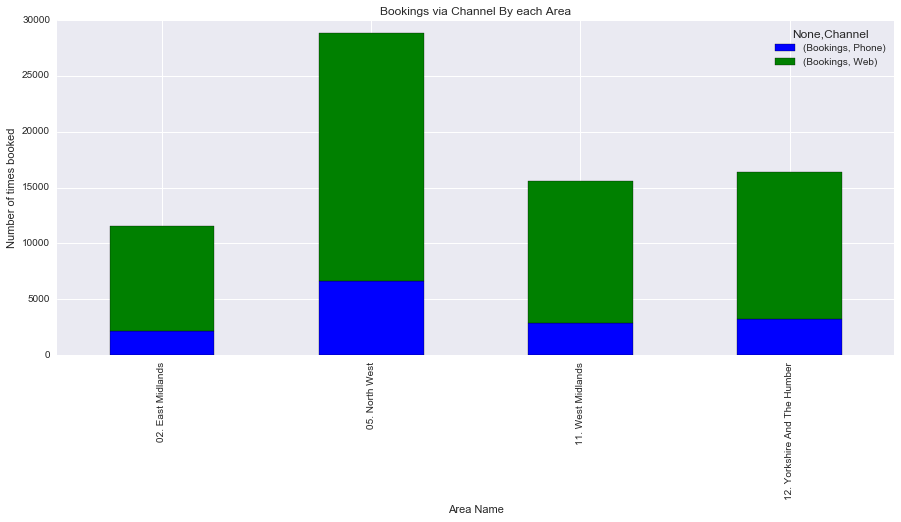

In [45]:
#lets plot a simple graph to see the the number of times each channel is used for booking by each of the 4 areas under consideration
my_plot = nym_data_to_plot_grp.unstack().plot(kind="bar", stacked=True, title="Bookings via Channel By each Area")
my_plot.set_xlabel('Area Name')
my_plot.set_ylabel('Number of times booked')

From the above graph it can be seen that **05. North West** had the highest bookings with most of them via the **Web**

Since the campaigin was between 11th June 2015 to 17th July 2015 (1 month 6 days) lets see if there was any particular change in the booking during those months or afterwards .
Lets examine the booking pattern

In [46]:
booking_patterns = nym_data[['Bookings','BookingDate']]
booking_patterns.head()

,Bookings,BookingDate
4,1,2015-12-31
16,11,2015-12-31
17,2,2015-12-31
32,1,2015-12-31
33,1,2015-12-31


In [47]:
#lets plot a simple graph to show the booking. lets start by setting the BookingDate as the index of data
pattern_plot = booking_patterns.set_index('BookingDate')
pattern_plot.head()

,Bookings
BookingDate,
2015-12-31,1
2015-12-31,11
2015-12-31,2
2015-12-31,1
2015-12-31,1


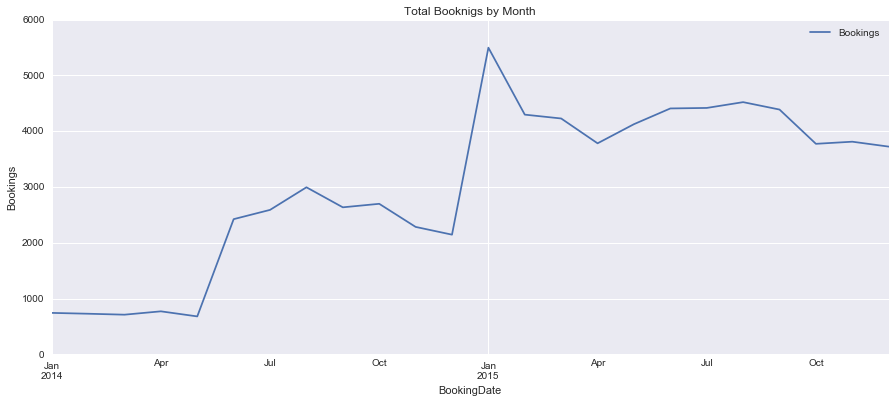

In [48]:
#let's look at the bookings by weeks by specing "W", # we can look by Month by specifying 'M'
pattern_plot = pattern_plot.resample('M', how=sum).plot(title="Total Booknigs by Month")
pattern_plot.plot()
pattern_plot.set_ylabel('Bookings')
#fig = pattern_plot.get_figure() # get fig , in case we want to save image
#fig.savefig("totalBookings.png")#save graph as image

From the plot above it can be seen that in these 4 areas , the bookings in 2015 was high in January which seemed to have come from late December. And it declined towards February. June was low as well as July. August and Semptember seemed slightly relatively high.

Looking at the Month of June and July within which the TV campaign was carried in this 4 areas there was no any vary significant change in those 2 months and also the months after those months except that there was minimul relative high bookings in September . Perhaps the impact might not be seen in those same months (June, July) but perhaps after. If anything at all there were higher bookings somewhere in late December 2014 leading to January 2015? what is causing these higher bookings in Late December 2014?

**TIME SERIES ANALYSIS OF FLIGHT BOOKINGS**

**We can also analysis the entire data with a timeseries analysis. This will help us predict the bookings and also make future forescasts**

We need to convert our data into timeseries data in order to do our analyis in time series

In [54]:
booking_dateparse = lambda BookingDate: pd.datetime.strptime(BookingDate, '%d/%m/%Y')
booking_data = pd.read_csv('NFDTVBookingData.csv', parse_dates='BookingDate', index_col='BookingDate',date_parser=booking_dateparse)
print(booking_data.head())

            Channel           AreaName BookingSource BookingMedium  Bookings
BookingDate                                                                 
2015-12-31    Phone           01. East                                     7
2015-12-31    Phone          10. Wales                                     2
2015-12-31      Web           01. East      (direct)        (none)         2
2015-12-31      Web           01. East          bing           cpc         1
2015-12-31      Web  02. East Midlands       nfeshot         email         1


Now lets check if our booking data has datetimes as index

In [55]:
booking_data.index

DatetimeIndex(['2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31',
               ...
               '2014-06-01', '2014-06-01', '2014-06-01', '2014-06-01',
               '2014-06-01', '2014-06-01', '2014-06-01', '2014-06-01',
               '2014-06-01', '2014-06-01'],
              dtype='datetime64[ns]', name='BookingDate', length=76477, freq=None)

Let's examine the trend of the bookings and  observe the nature and other features. Hence we will be dealing with Bookings over time 
period. Lets put the other columns like AreaName, BookingSource and BookingMedium aside for the time being.

In [56]:
ts_booking_data= booking_data['Bookings'].resample('D')  #consider the bookings in terms of days

ts_booking_data.head(n=10) # check first 10 rows

BookingDate
2014-06-01    2.000000
2014-06-02    2.482759
2014-06-03    2.330769
2014-06-04    2.414815
2014-06-05    2.543860
2014-06-06    2.198113
2014-06-07    2.074380
2014-06-08    2.027523
2014-06-09    2.643939
2014-06-10    2.526786
Freq: D, Name: Bookings, dtype: float64

Now we are going to check for *stationarity* in the time series data. Why are we checking the stationarity of the time series data? 
it is assumed that if the data has a particular behaviour over time, it is more likely that it will have similar behaviour in the future. First we will plot the timeseries graph and see how it looks then we can continue with any other necesary work


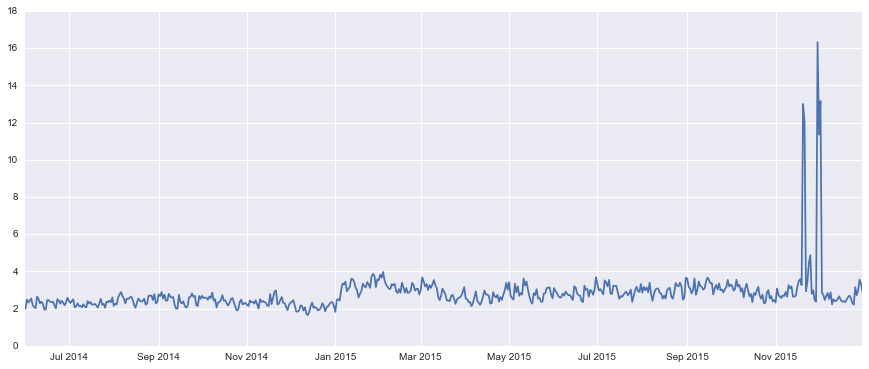

In [57]:
tsplot = plt.plot(ts_booking_data)

it can be seen the graph above that there slight variance and trend in the data and also seasonality as there seem to be spike in the data in the middle of November . It can also be seen that the bookings in 2015 were slight higher than the bookings in 2014. Also as we noted from our summary of the booking data above the average bookings appear to hover around 3 bookings.


This is just to the visual eye but we can check for stationarity.
by 
**Plotting Rolling Statistics** and using **Dickey-Fuller Test**

**Plotting Rolling Statistics**: We will plot the moving average and the moving standard deviation of our data to see if tje bookings   vary with time
**Dickey-Fuller Test** This is one of the statistical tests that i wil employ. With this test, the Null Hypothesis states that our timeseries datas is not stationary. So we will want to check that 

In [58]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

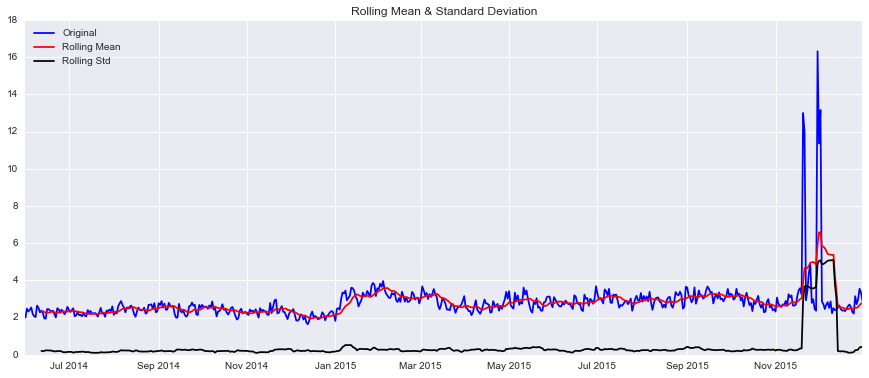

Results of Dickey-Fuller Test:
Test Statistic                  -4.373406
p-value                          0.000331
#Lags Used                      18.000000
Number of Observations Used    560.000000
Critical Value (5%)             -2.866715
Critical Value (10%)            -2.569526
Critical Value (1%)             -3.442081
dtype: float64


In [59]:
test_stationarity(ts_booking_data)

**Observations from test:** 
It can be seen that the *rolling mean* appears to vary slightly with time. The standard devaiation also varies slightly with time. 


However, From the **Dickey-Fuller Test:** it can be seen that the Test Statistic   is less that the 10% critical value. It is more negative and the Null Hypothesis will be more rejected. Also the p-value is way less than the stastical p-value of 0.05 . which means we have a good cause to reject the Null Hypothesis with 90% confidence level which claims the series is not stationary. However as there appears to be slight variations in the rolling mean and also there are slight trends and seasonality in the data we will need to care of these later on.

**Forecasting time series**

we will forecast our booking using ARIMA (Auto-Regressive Integrated Moving Averages). For us to get the 'p' and 'q' values in the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) functions we wil first plot ACF and PACF graphs

First lets try to reduce the trend and seasonality from our data by taking the logarithms of our bookings. This will also help us  get our p (ACF), q(PACF) values for ARIMA model when we plot the ACF and PACF

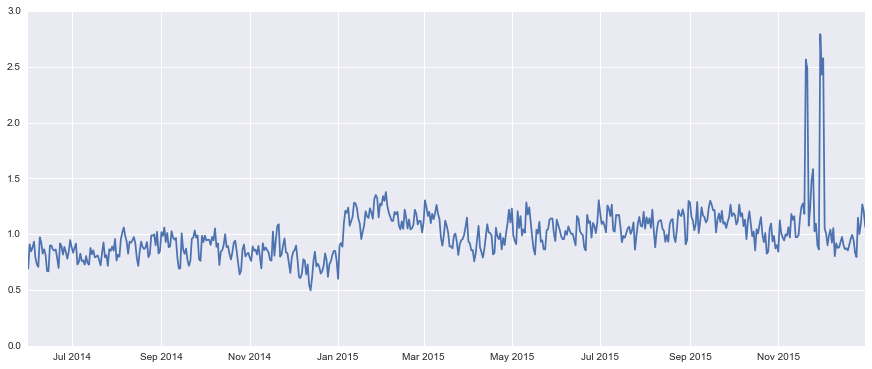

In [60]:
ts_booking_log = np.log(ts_booking_data) 
plt.plot(ts_booking_log) # plot and check trend after taking the logs of our values

There still seem to be a bit of trend and variations in the data so we will further remove that trend with Differencing.


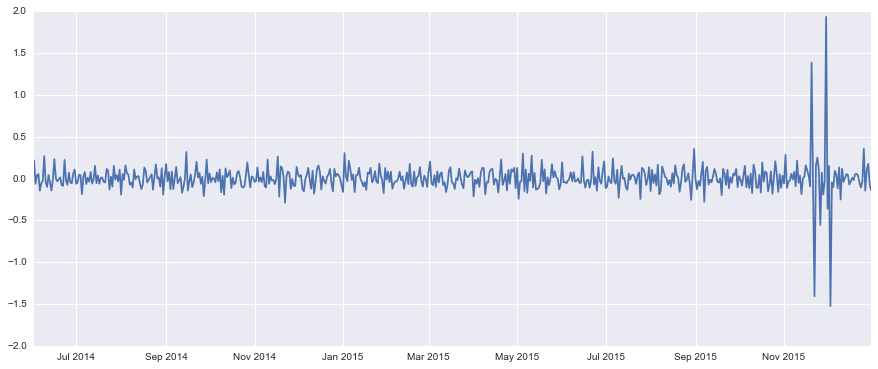

In [61]:
ts_booking_log_diff = ts_booking_log - ts_booking_log.shift()
plt.plot(ts_booking_log_diff)

In [ ]:
ts_booking_log_diff

Lets check and test for stationarity again and observe the rolling mean and standard deviation

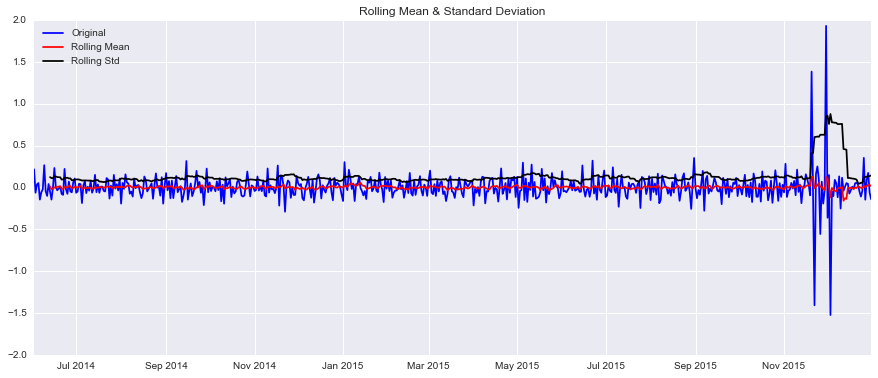

Results of Dickey-Fuller Test:
Test Statistic                -6.612265e+00
p-value                        6.333504e-09
#Lags Used                     1.400000e+01
Number of Observations Used    5.630000e+02
Critical Value (5%)           -2.866687e+00
Critical Value (10%)          -2.569511e+00
Critical Value (1%)           -3.442019e+00
dtype: float64


In [62]:
ts_booking_log_diff.dropna(inplace=True)
test_stationarity(ts_booking_log_diff)

We can see from the above test that the mean now has very slight variations over time. The standard deviation is also stable with slight spike towards the end of the year. The rolling mean is pretty stable even at at the points in the graph which there is a high spike in the booking, unlike in our previous test where the rolling mean also spiked.
And the ** Dickey-Fuller Test** still shows that the Test Static values is more negative than the critical values hence we can reject the Null Hypothesis with 95% confidence level and say that our booking data is stationary. 

In [64]:
#Let's start with our ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_booking_log_diff, nlags=40)
lag_pacf = pacf(ts_booking_log_diff, nlags=40, method='ols')

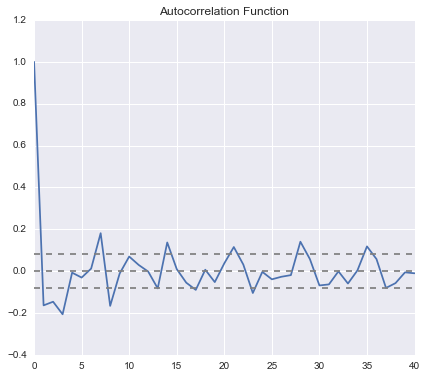

In [65]:
#Lets Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_booking_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_booking_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

From the ACF graph it can be seen that the value at which graph crosses the upper confident level is 1

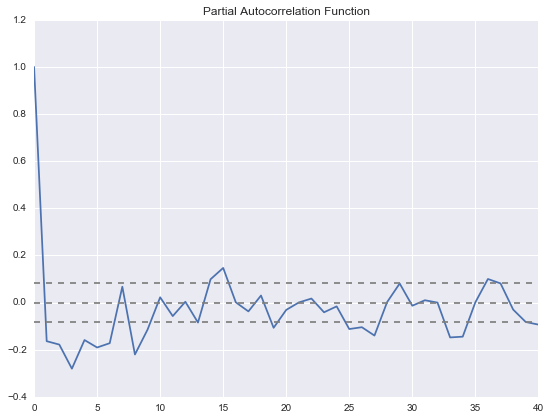

In [66]:
#Lets Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_booking_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_booking_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From the PACF graph it can be seen that the value at which graph crosses the upper confident level is 1

In [67]:
from statsmodels.tsa.arima_model import ARIMA


lets build our **AR MODEL**

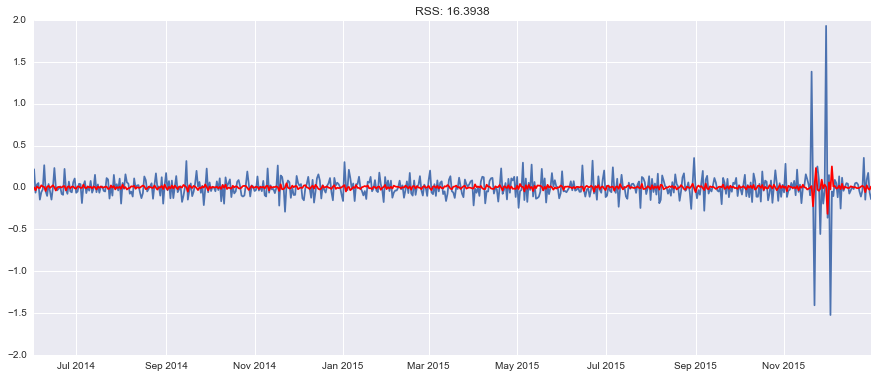

In [68]:

model = ARIMA(ts_booking_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_booking_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_booking_log_diff)**2))

Lets build our **MA Model**

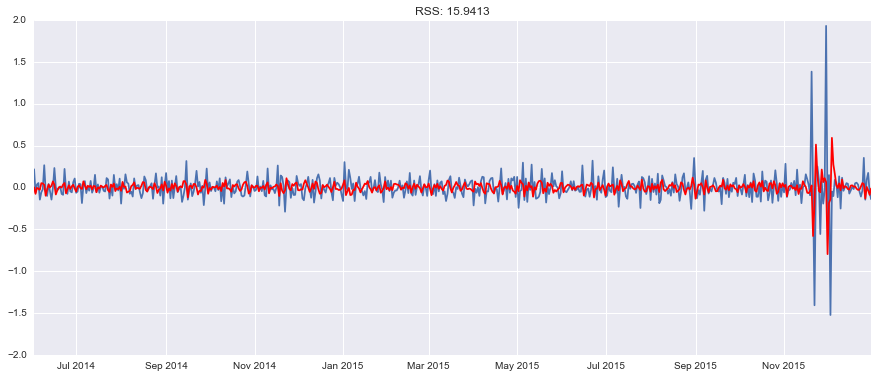

In [69]:
model = ARIMA(ts_booking_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_booking_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_booking_log_diff)**2))

lets combine the two models (**AR** and **MA**) together and build an **ARIMA** model out of them


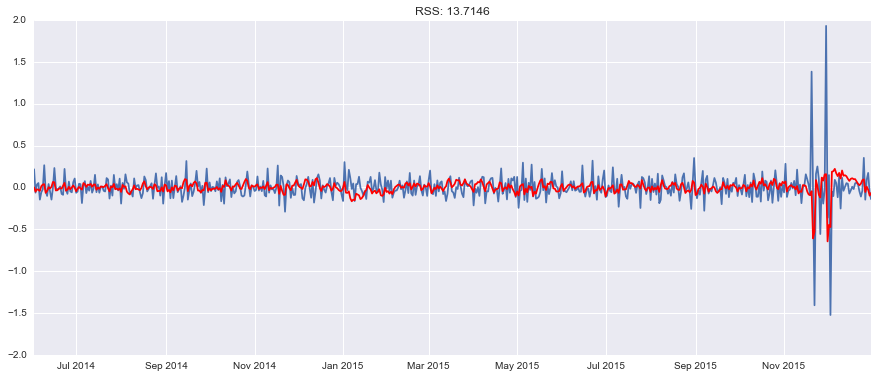

In [70]:
model = ARIMA(ts_booking_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_booking_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_booking_log_diff)**2))

From all the three models built, the AR ,the MA and the ARIMA (the combination of both plus the differencing) it can be seen that the **ARIMA** Model has the lowest residual values. Hence we will make our predictions using the **ARIMA** Model with 1 order / level differencing.

However before that, let's scale our log values back to the original values so we can examine how our model fits



In [71]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

BookingDate
2014-06-02    0.000429
2014-06-03   -0.050938
2014-06-04   -0.022530
2014-06-05   -0.029525
2014-06-06   -0.042229
Freq: D, dtype: float64


#check head of original booking data and compare with fitted values head

In [72]:
ts_booking_data.head(n=5) # both head dates differ and we will fix this in subsequent steps .

BookingDate
2014-06-01    2.000000
2014-06-02    2.482759
2014-06-03    2.330769
2014-06-04    2.414815
2014-06-05    2.543860
Freq: D, Name: Bookings, dtype: float64

In [73]:
#first lets take the cumulative sum at the index and then add it to the base number 
predictions_ARIMA_diff_cumsum = abs(predictions_ARIMA_diff.cumsum())
print(predictions_ARIMA_diff_cumsum.head())

BookingDate
2014-06-02    0.000429
2014-06-03    0.050510
2014-06-04    0.073039
2014-06-05    0.102564
2014-06-06    0.144793
Freq: D, dtype: float64


In [ ]:
#Lets now exponent the values and compare with our original data series

In [75]:
predictions_ARIMA_log = pd.Series(ts_booking_log.ix[0], index=ts_booking_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

BookingDate
2014-06-01    0.693147
2014-06-02    0.693576
2014-06-03    0.743657
2014-06-04    0.766187
2014-06-05    0.795711
Freq: D, dtype: float64

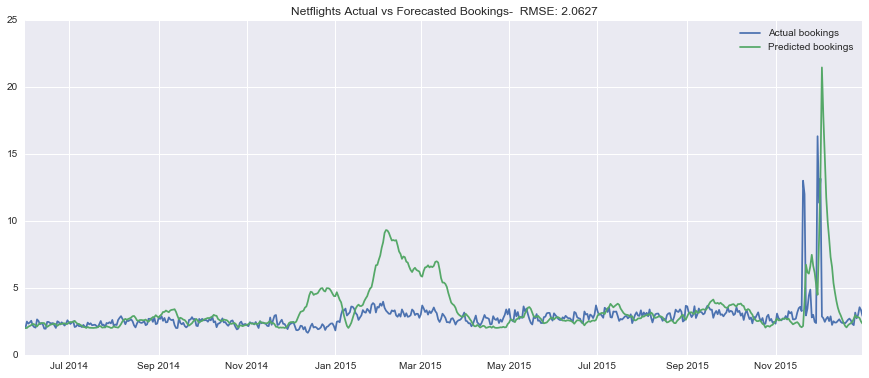

In [76]:
#let's now predict our Netflights bookings using our ARIMA model
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_booking_data, label = 'Actual bookings')
plt.plot(predictions_ARIMA, label = 'Predicted bookings')
plt.legend(loc='best')
plt.title('Netflights Actual vs Forecasted Bookings-  RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_booking_data)**2)/len(ts_booking_data)))

Now we can see our **predicted bookings** are in **Green** colour and the **actual bookings** are in colour **blue**. This is just for illustration purposes and the algorithm can be fine tuned